<a href="https://colab.research.google.com/github/samuelfribeiro/Analise-Descritiva-Chamados/blob/main/An%C3%A1lise_Descritiva_Chamados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise da Base de Chamados do Servicedesk 

##Apresentação

Essa análise descritiva foi realizada para conhecimento da realidade quanto ao tempo de resolução dos chamados recebidos e com objetivo de levantar os pontos de melhorias a fim de reduzir seu tempo médio.

**Fonte de Dados**: Planilha extraída do sistema de Service Desk

**Dicionário de Dados**


*   **ID**: Identificador único e interno do chamado
*   **DESCRICAO**: Descrição do requerimento do usuário
*   **NUMERO**: Número único para acompanhamento do chamado
*   **DATA_ABERTURA**: Data da abertura do chamado
*   **USUARIO_SOLICITANTE**: Usuário que fez a requisição
*   **UNIDADE_ORIGEM**: Unidade de lotação do usuário requerente
*   **TIPO**: Classificação do chamado quanto à sua natureza (chamado, requisição, mudança ou incidente)
*   **ESTADO**: Situação do chamado (aberto ou fechado)
*   **IDADE**: Tempo que o chamado levou para ser atendido
*   **DATA_ENCERRAMENTO**: Data em que o chamado foi encerrado
*   **USUARIO_ENCERRAMENTO**: Usuário que procedeu com o encerramento




##Importação das bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Carga dos dados

In [ ]:
chamados = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dados/Chamados CSC/chamados.xlsx')

# Filtra os dados de julho de 2021 por estarem incompletos
chamados = chamados.query('(DATA_ABERTURA < "2021-07-01") or (DATA_ENCERRAMENTO < "2021-07-01")')

# Cria as colunas de ano / mês
chamados['ANO_ABERTURA'] = pd.to_numeric(chamados['DATA_ABERTURA'].dt.strftime("%Y"))
chamados['MES_ABERTURA'] = pd.to_numeric(chamados['DATA_ABERTURA'].dt.strftime("%m"))
chamados['ANO_ENCERRAMENTO'] = pd.to_numeric(chamados['DATA_ENCERRAMENTO'].dt.strftime("%Y"))
chamados['MES_ENCERRAMENTO'] = pd.to_numeric(chamados['DATA_ENCERRAMENTO'].dt.strftime("%m"))

chamados.head()

,ID,DESCRICAO,NUMERO,DATA_ABERTURA,USUARIO_SOLICITANTE,UNIDADE_ORIGEM,TIPO,SERVICO,ULTIMA_ALTERACAO,MODO_ABERTUA,ESTADO,IDADE,DATA_ENCERRAMENTO,USUARIO_ENCERRAMENTO,ANO_ABERTURA,MES_ABERTURA,ANO_ENCERRAMENTO,MES_ENCERRAMENTO
0,7362,Erro - Chamada dos agendados,175,2018-03-06 16:08:31,joao.spagnol,18ª ZE,2.Incidente,Atendimento::Agendamento - Sistema de Agendame...,2018-03-06 18:19:34,Interface Web,Fechado,0.09,2018-03-06 18:19:34,lusiane.braun,2018,3,2018,3
1,7553,ponto eletrônico,242,2018-03-07 13:29:21,andrade,91ª ZE,2.Incidente,z::3.Equipamentos de Informática::Relógio Ponto,2018-04-17 14:59:16,Interface Web,Fechado,41.00,2018-03-09 14:43:41,andre.hermenegildo,2018,3,2018,3
2,7705,Publicador intranet,309,2018-03-07 16:13:50,ayrton,SL,3.Requisição de serviço,Conteúdo e Publicações::Site Institucional::TY...,2018-03-09 16:43:54,Interface Web,Fechado,2.00,2018-03-09 16:43:53,andre.hermenegildo,2018,3,2018,3
3,8131,Breve [979738] - Informação de desligamento [l...,434,2018-03-08 18:37:21,klumb,SGSTI,3.Requisição de serviço,z::9.Outros::Informação de Desligamento - TRE,2018-03-09 14:26:49,Equipe técnica,Fechado,0.83,2018-03-09 14:26:48,diego.kern,2018,3,2018,3
4,8131,Breve [979738] - Informação de desligamento [l...,434,2018-03-08 18:37:21,klumb,SGSTI,3.Requisição de serviço,z::9.Outros::Informação de Desligamento - TRE,2018-03-09 14:26:49,Equipe técnica,Fechado,0.83,2018-03-09 14:26:48,diego.kern,2018,3,2018,3


In [ ]:
chamados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22462 entries, 0 to 22498
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    22462 non-null  int64         
 1   DESCRICAO             22462 non-null  object        
 2   NUMERO                22462 non-null  int64         
 3   DATA_ABERTURA         22462 non-null  datetime64[ns]
 4   USUARIO_SOLICITANTE   22381 non-null  object        
 5   UNIDADE_ORIGEM        21607 non-null  object        
 6   TIPO                  22462 non-null  object        
 7   SERVICO               22462 non-null  object        
 8   ULTIMA_ALTERACAO      22462 non-null  datetime64[ns]
 9   MODO_ABERTUA          22462 non-null  object        
 10  ESTADO                22462 non-null  object        
 11  IDADE                 22462 non-null  float64       
 12  DATA_ENCERRAMENTO     22462 non-null  datetime64[ns]
 13  USUARIO_ENCERRAM

###Cria sub datasets para análises específicas

In [ ]:
# Dataset por tipo
incidentes = chamados.query('TIPO == "2.Incidente" or TIPO == "4.Problema"')
mudancas = chamados.query('TIPO == "6.Mudança normal" or TIPO == "5.Mudança pré-aprovada"')
requisicoes = chamados.query('TIPO == "3.Requisição de serviço" or TIPO == "7.Atividade"')

# Dataset por ano
chamados_2018 = chamados.query('ANO_ABERTURA == 2018')
chamados_2019 = chamados.query('ANO_ABERTURA == 2019')
chamados_2020 = chamados.query('ANO_ABERTURA == 2020')
chamados_2021 = chamados.query('ANO_ABERTURA == 2021')

##Análise da variável idade do chamado

In [ ]:
chamados['IDADE'].describe()

count    22462.000000
mean        35.876329
std        105.700935
min          0.000000
25%          0.150000
50%          2.000000
75%         18.000000
max       1144.000000
Name: IDADE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


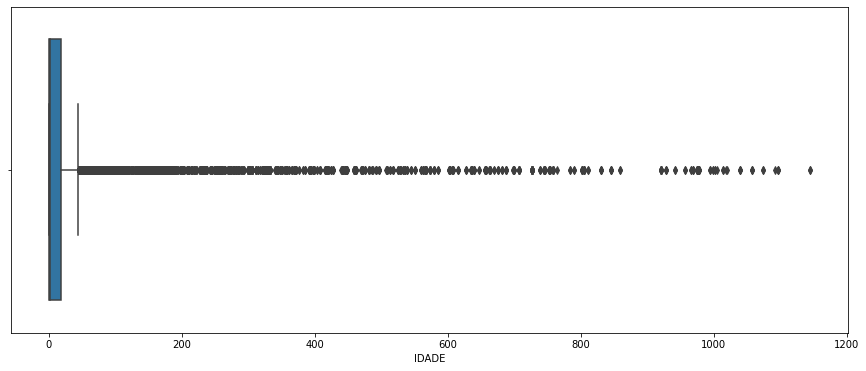

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(chamados['IDADE'])

In [ ]:
#Cálculo para excluir os valores outliers da análise
Q1 = chamados['IDADE'].quantile(.25)
Q3 = chamados['IDADE'].quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - (1.5 * IIQ)
limite_superior = Q3 + (1.5 * IIQ)

selecao = (chamados['IDADE'] >= limite_inferior) & (chamados['IDADE'] <= limite_superior)

df = chamados[selecao]
df['IDADE'].describe()


count    19161.000000
mean         5.945070
std          9.795634
min          0.000000
25%          0.100000
50%          1.000000
75%          7.000000
max         44.000000
Name: IDADE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


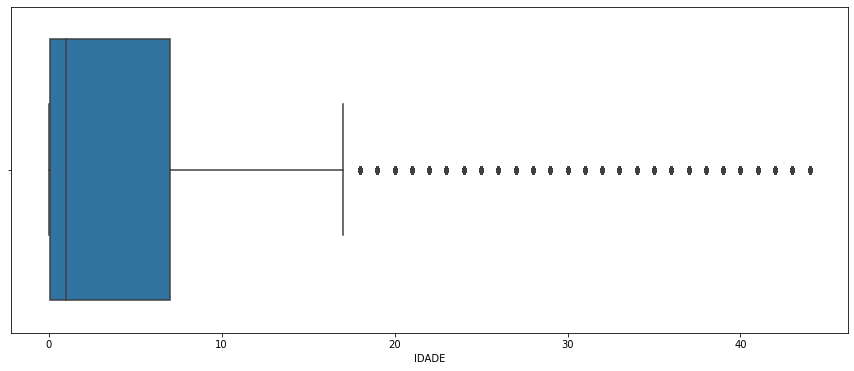

In [ ]:
#nova avaliação sem os outliers
plt.figure(figsize=(15, 6))
sns.boxplot(df['IDADE'])

In [ ]:
#Análise por tipo do incidente
df.groupby('TIPO')['IDADE'].agg(['count', 'mean', 'min', 'max']).round(3)

,count,mean,min,max
TIPO,,,,
2.Incidente,5236,5.301,0.00,44.0
3.Requisição de serviço,11064,3.999,0.00,44.0
4.Problema,8,17.750,3.00,34.0
5.Mudança pré-aprovada,132,15.374,0.00,43.0
6.Mudança normal,2611,14.824,0.01,44.0
7.Atividade,110,9.391,0.00,42.0


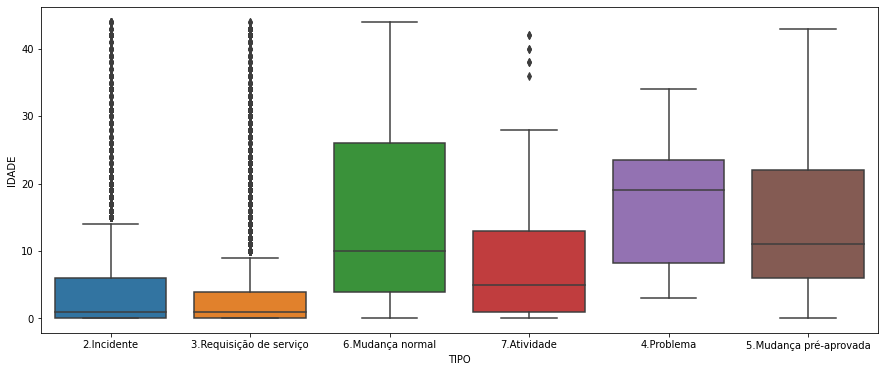

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='TIPO', y='IDADE', data=df, orient='v')

##Análise da variável Unidade solicitante

In [ ]:
chamados_unidades = chamados.groupby('UNIDADE_ORIGEM')['IDADE'].agg(['count']).reset_index()
chamados_unidades.rename(columns={"count": "QTDE_CHAMADOS"}, inplace=True)

# Remove as unidades da sti que abrem chamados em nome de outras
unidades_sti = ['CSC', 'SADS', 'SAS', 'SAD', 'SGCW', 'SGPTI', 'CSIT', 'SARS', 'SGATI', 'SGMPTI', 'SGSTI']

chamados_unidades = chamados_unidades[~chamados_unidades['UNIDADE_ORIGEM'].isin(unidades_sti)]

# Seleciona as 10 unidades com maior número de chamados abertos
chamados_unidades_top_10 = chamados_unidades.sort_values('QTDE_CHAMADOS', ascending=False).head(10)

# Cria o dataframe para o gráfico de comparação entre as top 10 e as demais unidades
soma_chamados = chamados_unidades['QTDE_CHAMADOS'].sum()
soma_top_10 = chamados_unidades_top_10['QTDE_CHAMADOS'].sum()

df_grafico = pd.DataFrame({'UNIDADES': ['Top 10', 'Demais unidades'], 'QTDE_CHAMADOS': [soma_top_10, soma_chamados]})

df_grafico

,UNIDADES,QTDE_CHAMADOS
0,Top 10,5439
1,Demais unidades,18459


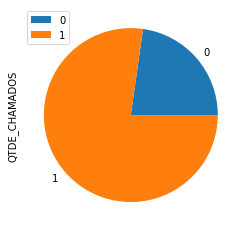

In [ ]:
df_grafico.plot.pie(y='QTDE_CHAMADOS')

In [ ]:
chamados_unidades_top_10

,UNIDADE_ORIGEM,QTDE_CHAMADOS
190,SS,967
176,SLOT,771
172,SL,641
156,SE-EJESC,636
161,SEREF,561
191,SSACE,479
121,CRECAD,387
146,SAPQS,355
178,SOCE,322
158,SEB,320


##Análise Abertura dos Chamados


Análise foi realizada ano a ano para fazer um comparativo distinto

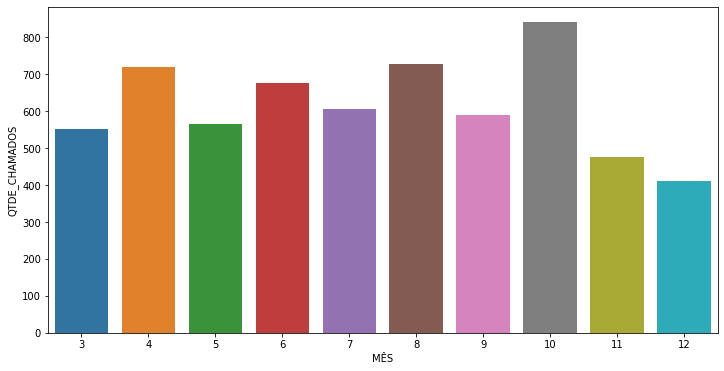

In [ ]:
df_grafico = chamados_2018.groupby('MES_ABERTURA')['ID'].agg(['count']).reset_index();
df_grafico.rename(columns={'MES_ABERTURA': 'MÊS', 'count': 'QTDE_CHAMADOS'}, inplace=True)

fig = plt.figure(figsize=(12,6))
sns.barplot(x='MÊS', y='QTDE_CHAMADOS', data = df_grafico)

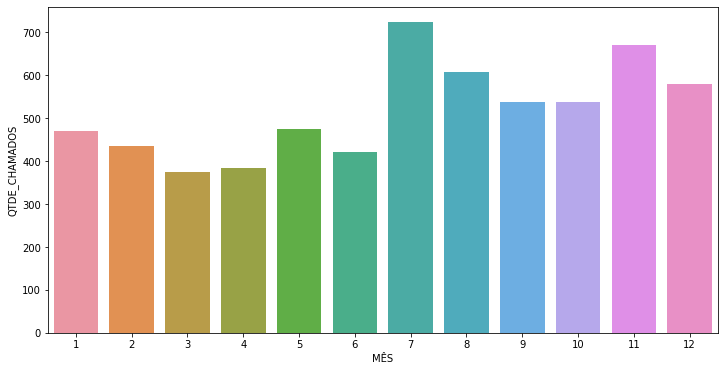

In [ ]:
df_grafico = chamados_2019.groupby('MES_ABERTURA')['ID'].agg(['count']).reset_index();
df_grafico.rename(columns={'MES_ABERTURA': 'MÊS', 'count': 'QTDE_CHAMADOS'}, inplace=True)

fig = plt.figure(figsize=(12,6))
sns.barplot(x='MÊS', y='QTDE_CHAMADOS', data = df_grafico)

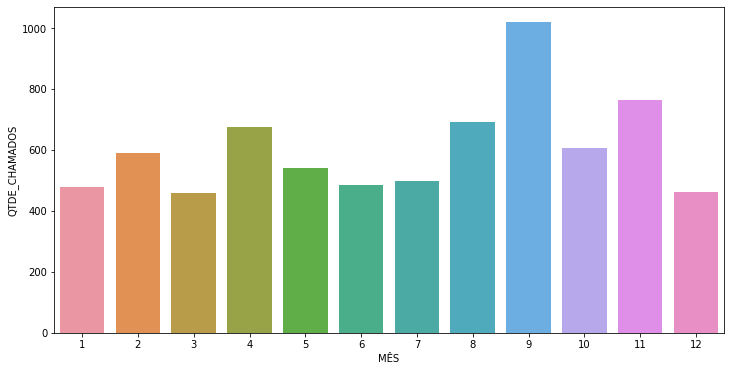

In [ ]:
df_grafico = chamados_2020.groupby('MES_ABERTURA')['ID'].agg(['count']).reset_index();
df_grafico.rename(columns={'MES_ABERTURA': 'MÊS', 'count': 'QTDE_CHAMADOS'}, inplace=True)

fig = plt.figure(figsize=(12,6))
sns.barplot(x='MÊS', y='QTDE_CHAMADOS', data = df_grafico)

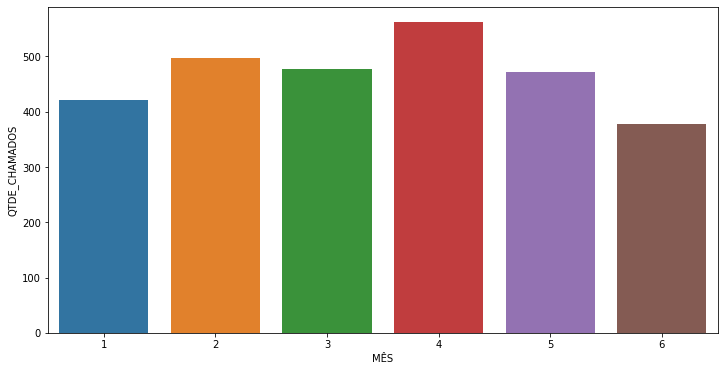

In [ ]:
df_grafico = chamados_2021.groupby('MES_ABERTURA')['ID'].agg(['count']).reset_index();
df_grafico.rename(columns={'MES_ABERTURA': 'MÊS', 'count': 'QTDE_CHAMADOS'}, inplace=True)

fig = plt.figure(figsize=(12,6))
sns.barplot(x='MÊS', y='QTDE_CHAMADOS', data = df_grafico)

##Análise do Estudo Realizado

**Idade do Chamado**

A idade do chamado (tempo entre a abertura e seu encerramento) está fortemente relacionada com o seu tipo.

Chamados considerados como "mudança" tem uma duração maior do que os demais tipos, o que leva a sugestão de ampliar a equipe destinada ao tratamento das mudanças para que a média geral da idade dos chamados seja reduzida.

**Unidade de Origem**

Não existe uma distribuição uniforme do número de chamado aberto pelas diversas unidades organizacionais.

Existem em torno de 200 unidades, porém, 10 delas são responsáveis pela abertura de aproximandamento 25% dos chamados.

Sugere-se um levantamento nessas unidades para identificar a causa do volume de chamados nessas unidades e as possíveis medidas preventivas para melhorar essa distribuição.

**Período de Abertura dos Chamados**

Não foi identificada uma variação significativa na quantidade de chamados abertos durante os meses do ano.

Uma pequena variação para cima pode ser verificada no segundo semestre, quando existe um incremento no volume de atividades das unidades.